In [2]:
import numpy as np
from scipy.io import wavfile
import wave
import matplotlib.pyplot as plt


In [3]:
filename = "sample.wav"
sample_rate, data = wavfile.read(filename)
n_samples = data.shape[0]

/tmp/ipykernel_9611/2853408197.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(filename)


In [4]:
print(f"sample rate {sample_rate}")
print(f"data shape {data.shape}") # samples, dimensions(n channels)
print(f"N samples {n_samples}")
print(f"Call duration (seconds): {len(data) / sample_rate : .3f}")

sample rate 44100
data shape (1322253, 2)
N samples 1322253
Call duration (seconds):  29.983


In [5]:
x = data[:, 0]
time = [i/sample_rate for i in range(len(x))]

In [6]:
print([x[i] for i in range(220500, 220510)])

[108, 100, 96, 88, 83, 77, 68, 69, 53, 56]


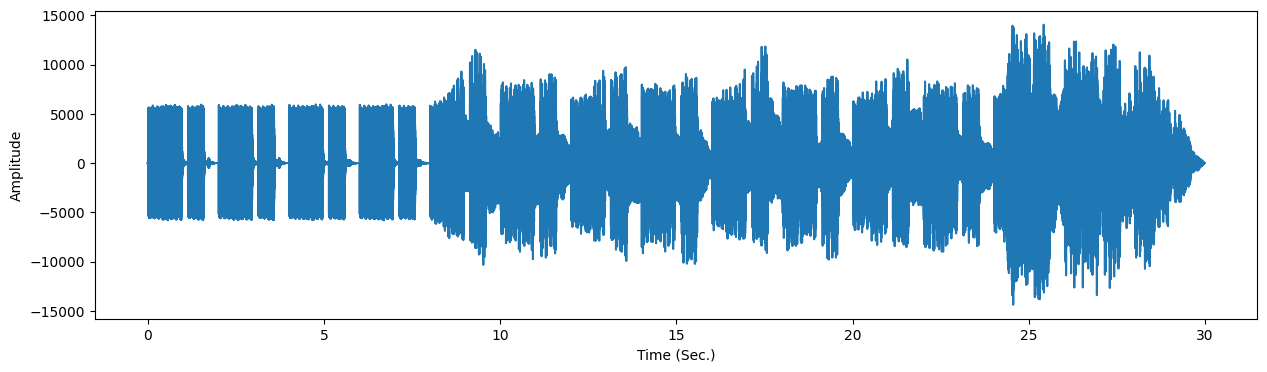

In [7]:
plt.figure(figsize=(15, 4))
plt.plot(time, x)
plt.xlabel('Time (Sec.)')
plt.ylabel('Amplitude')
plt.show()

## FFT Step

In [8]:
from numpy.fft import fft, ifft, fftfreq, fftshift, rfft, irfft, ifftshift

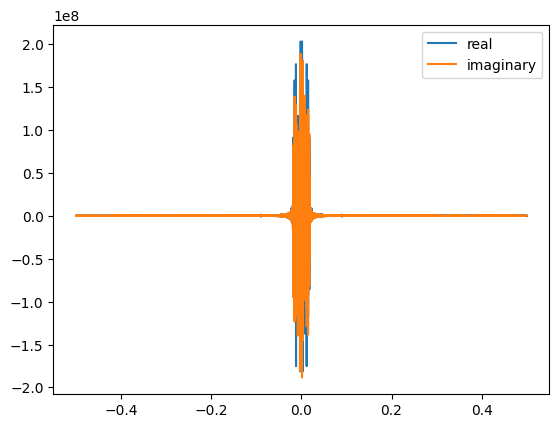

In [9]:
x_fft = fft(x) # Fast fourier transform w/ real & imaginary components
fft_sample_frequencies = fftfreq(x.size) # DFT sample frequencies
plt.plot(fft_sample_frequencies, x_fft.real, label='real')
plt.plot(fft_sample_frequencies, x_fft.imag, label='imaginary')
plt.legend()
plt.show()

In [10]:
x_fft[:10]

array([285537.        +1.12049747e-09j, 261830.30309353+1.61957296e+05j,
        80073.99648626+1.75407090e+05j, -30580.03109613+1.38658010e+05j,
       -40401.7122238 -1.32005517e+04j,  60670.65305574-3.86571184e+04j,
        89118.56957949-1.36026964e+04j,  73663.16967179+3.16211087e+04j,
        64653.41817641+3.62739009e+04j,  28918.32002387-1.40263944e+04j])

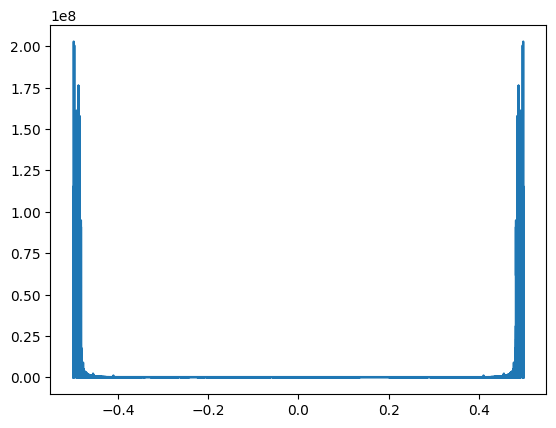

In [11]:
x_fft_shifted = fftshift(fft(x, n_samples))
x_fft_freq = fftfreq(x.size)
plt.plot(x_fft_freq, abs(x_fft_shifted))

## Embedding Step

In [13]:
text = "My name is Slim Shady"
# convert to binary
bin_text = bin(int.from_bytes(text.encode(), 'big'))[2:]
print(bin_text)

10011010111100100100000011011100110000101101101011001010010000001101001011100110010000001010011011011000110100101101101001000000101001101101000011000010110010001111001


In [14]:
# Starting embedding

frame = len(bin_text) # total length of bits to embed
embed_sample_sz = 10 # number of samples used to embed each bit
p = frame*embed_sample_sz # total number of samples used for embedding data
centre = n_samples/2+1 #centre frequency/ zero point

embeddinpirg_freq = 5000 # in hz

X_abs = abs(x_fft_shifted) # positive values of fft
X_angle = np.angle(x_fft_shifted) # angle of each point in fft

Y = X_abs
X_embed = X_abs[int(centre - embedding_freq - p):int(centre - embedding_freq)]

a = 0.1 # amplification factor of embedding

x_mat = X_embed.reshape(frame, embed_sample_sz) # split by 
x_mat.shape

(167, 10)

In [79]:
# Embedding algorithm loop
for k in range(frame):
    avg = 0
    
    for l in range(embed_sample_sz): # take average of 10 samples
        avg = avg+x_mat[k][l]
    avg = avg/embed_sample_sz
    
    if bin_text[k] == '0': # bit to encode is '0'
        print('0', end = ' ')
        for l in range(embed_sample_sz):
            x_mat[k][l] = avg # set all 10 samples to same avg value - indicates 0

    else: # when bit is '1'
        print('1', end=' ')
        for l in range(int(embed_sample_sz/2)): # from 0 to 4
            x_mat[k][l] = a*avg # set first half to 0.1*avg
        for l in range(int(embed_sample_sz/2), embed_sample_sz): # 5 to 10
            x_mat[k][l] = (2-a)*avg # 2nd half to 1.9*avg

1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 

In [80]:
# Add embeddings to full data
x_vec = x_mat.reshape(p) # bring it back to vector/array

# define range for adding embeddings back to final fft vec with embeddings
range_embed_1 = range(int(centre-embedding_freq-p), int(centre-embedding_freq))
range_embed_2 = range(int(centre+embedding_freq+1), int(centre+embedding_freq+p+1))

Y[range_embed_1] = x_vec
Y[range_embed_2] = x_vec[::-1] # reversed x_vec for symmetry

In [42]:
Y1 = np.multiply(Y, np.exp(1j*X_angle)) # embedded signal with phase information

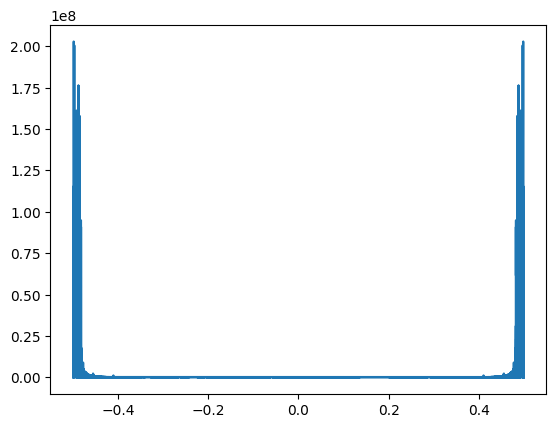

In [82]:
plt.plot(x_fft_freq, abs(Y1))

In [108]:
embedded_signal = ifft(ifftshift(Y1))
embedded_signal

wavfile.write('out.wav', int(sample_rate), abs(embedded_signal))

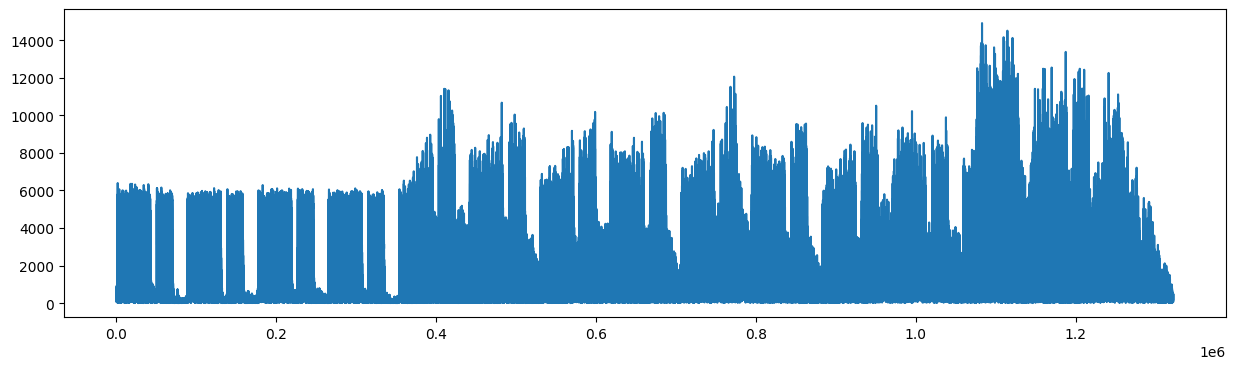

In [107]:
plt.figure(figsize=(15, 4))
plt.plot(abs(embedded_signal))

In [88]:
abs(embedded_signal)

array([ 96.06239619,  96.76153386,  96.08929038, ..., 104.65810199,
        99.84779428,  97.90509391])

In [89]:
embedded_signal.real

array([53.66946137, 64.21438095, 70.7383398 , ..., 26.95725626,
       33.53606692, 45.10841251])

In [99]:
embedded_signal

array([53.66946137 -79.67165668j, 64.21438095 -72.38306234j,
       70.7383398  -65.03259958j, ..., 26.95725626-101.12677512j,
       33.53606692 -94.0474042j , 45.10841251 -86.89441026j])